In [1]:
# Importing all the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from statistics import mode
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn import preprocessing


In [2]:
# read in data
df = pd.read_csv('laterality_data.csv')

In [3]:
# check in on data
df.head()

,Match Flag,subjectID,Data,Order_FA_child,Order_volume_child,Order_MD_child,structureID,gender,gender_non,Age_gr_12,...,LI MD,LI Volume,TOI,Control,category,hand,Hand,ROI 1,ROI 2,Type
0,3,P1158,PING,AnterioFrontoCerebellar,AnterioFrontoCerebellar,AnterioFrontoCerebellar,AnterioFrontoCerebellar,0,M,0-12,...,0.015758,-0.068848,no,no,Cerebellar,NaN,NaN,Frontal,Cerebellum,Projection
1,3,P1158,PING,Arc,Arc,Arc,Arc,0,M,0-12,...,NaN,0.167642,no,yes,Language,NaN,NaN,Frontal,Temporal,Association
2,3,P1158,PING,Aslant,Aslant,Aslant,Aslant,0,M,0-12,...,NaN,0.010843,yes,no,Vertical,NaN,NaN,Frontal,Frontal,Association
3,3,P1158,PING,CST,CST,CST,CST,0,M,0-12,...,0.002403,-0.012036,no,no,Motor,NaN,NaN,Medulla,Motor Cortex,Projection
4,3,P1158,PING,ContraAnterioFrontoCerebellar,ContraAnterioFrontoCerebellar,ContraAnterioFrontoCerebellar,ContraAnterioFrontoCerebellar,0,M,0-12,...,-0.014053,-0.066723,no,no,Cerebellar,NaN,NaN,Frontal,Cerebellum,Projection


In [4]:
df.count()

Match Flag            44648
subjectID             44648
Data                  44648
Order_FA_child        44648
Order_volume_child    44648
Order_MD_child        44648
structureID           44648
gender                44648
gender_non            44648
Age_gr_12             44648
Age Group             44648
Age                   44648
LI FA                 41241
LI MD                 41272
LI Volume             41040
TOI                   44648
Control               44648
category              44648
hand                  43510
Hand                  43390
ROI 1                 44648
ROI 2                 44648
Type                  44648
dtype: int64

In [5]:
# dropping all NA's or missing data
df.dropna(inplace=True)

In [6]:
df.count()

Match Flag            34609
subjectID             34609
Data                  34609
Order_FA_child        34609
Order_volume_child    34609
Order_MD_child        34609
structureID           34609
gender                34609
gender_non            34609
Age_gr_12             34609
Age Group             34609
Age                   34609
LI FA                 34609
LI MD                 34609
LI Volume             34609
TOI                   34609
Control               34609
category              34609
hand                  34609
Hand                  34609
ROI 1                 34609
ROI 2                 34609
Type                  34609
dtype: int64

In [7]:
df.describe()

,Match Flag,gender,Age,LI FA,LI MD,LI Volume,hand
count,34609.0,34609.000000,34609.000000,34609.000000,34609.000000,34609.000000,34609.000000
mean,3.0,0.556618,36.460999,0.014758,-0.009101,0.003943,70.359184
std,0.0,0.496791,15.026259,0.026767,0.024357,0.110333,46.750252
min,3.0,0.000000,18.000000,-0.187483,-0.120564,-0.726049,-100.000000
25%,3.0,0.000000,27.000000,-0.001247,-0.023805,-0.052326,70.000000
50%,3.0,1.000000,31.000000,0.014058,-0.008778,0.008024,88.000000
75%,3.0,1.000000,38.000000,0.029813,0.005455,0.063520,100.000000
max,3.0,1.000000,86.000000,0.237326,0.141657,0.649430,100.000000


In [8]:
# find all the columns for the features that we desire adn create a new dataframe
cols = [12]
the_ml_data = df[df.columns[cols]]

In [9]:
# Check in on data 
the_ml_data.head()
the_ml_data.count()

LI FA    34609
dtype: int64

In [10]:
# Find quick statistics about each feature
the_ml_data.describe()

,LI FA
count,34609.000000
mean,0.014758
std,0.026767
min,-0.187483
25%,-0.001247
50%,0.014058
75%,0.029813
max,0.237326


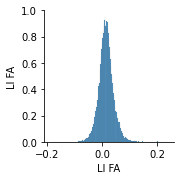

In [11]:
# create a pairplot to visually see correlations between data
sns.pairplot(the_ml_data, palette = 'magma')

## Machine Learning Model

#### Using elbow method to see how many clusters that will be most efficient for algorithm

In [12]:
# Normalize the data
# use min-max scaling to normalize the data
min_max_scaler = preprocessing.MinMaxScaler()
the_ml_data = min_max_scaler.fit_transform(the_ml_data)
the_ml_data = pd.DataFrame(the_ml_data)

In [13]:
the_ml_data

,0
0,0.488068
1,0.496884
2,0.476882
3,0.491020
4,0.474258
...,...
34604,0.276417
34605,0.510379
34606,0.551555
34607,0.329056


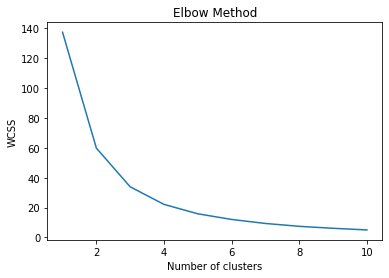

In [14]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(the_ml_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

###### Three Clusters seeem to be the best from the analysis above, but since we only have 1000 datapoints, 10 should be better as outliers would make their own clusters!

In [15]:
df.describe()

,Match Flag,gender,Age,LI FA,LI MD,LI Volume,hand
count,34609.0,34609.000000,34609.000000,34609.000000,34609.000000,34609.000000,34609.000000
mean,3.0,0.556618,36.460999,0.014758,-0.009101,0.003943,70.359184
std,0.0,0.496791,15.026259,0.026767,0.024357,0.110333,46.750252
min,3.0,0.000000,18.000000,-0.187483,-0.120564,-0.726049,-100.000000
25%,3.0,0.000000,27.000000,-0.001247,-0.023805,-0.052326,70.000000
50%,3.0,1.000000,31.000000,0.014058,-0.008778,0.008024,88.000000
75%,3.0,1.000000,38.000000,0.029813,0.005455,0.063520,100.000000
max,3.0,1.000000,86.000000,0.237326,0.141657,0.649430,100.000000


In [16]:
# other part
km = KMeans(n_clusters=6).fit(the_ml_data)


cluster_map = pd.DataFrame()
cluster_map['ID'] = df['subjectID']
cluster_map['data_index'] = the_ml_data.index.values
cluster_map['cluster'] = km.labels_ ########## This is where we put in the clusters that were found
cluster_map['Gender'] = pd.Series(df['gender'])
cluster_map['Age'] = pd.Series(df['Age'])
cluster_map['FA'] = df['LI FA']
cluster_map['Area'] = df['Order_FA_child']
cluster_map['AgeGroup'] = df['Age Group']
cluster_map

,ID,data_index,cluster,Gender,Age,FA,Area,AgeGroup
979,CC120462,0,2,1,18.0,0.019852,AnterioFrontoCerebellar,Adolescent
980,CC120462,1,2,1,18.0,0.023598,Aslant,Adolescent
981,CC120462,2,0,1,18.0,0.015100,CST,Adolescent
982,CC120462,3,2,1,18.0,0.021106,ContraAnterioFrontoCerebellar,Adolescent
983,CC120462,4,0,1,18.0,0.013985,ContraMotorCerebellar,Adolescent
...,...,...,...,...,...,...,...,...
44640,CC721374,34604,4,0,86.0,-0.070059,VOF,Senior
44641,CC721374,34605,2,0,86.0,0.029330,FrontoThalamic,Senior
44643,CC721374,34606,1,0,86.0,0.046822,MotorThalamic,Senior
44644,CC721374,34607,4,0,86.0,-0.047697,pArc,Senior


In [17]:
first_cluster = cluster_map[cluster_map.cluster == 0]
first_cluster.head()

,ID,data_index,cluster,Gender,Age,FA,Area,AgeGroup
981,CC120462,2,0,1,18.0,0.015100,CST,Adolescent
983,CC120462,4,0,1,18.0,0.013985,ContraMotorCerebellar,Adolescent
985,CC120462,6,0,1,18.0,0.014131,ILF,Adolescent
987,CC120462,8,0,1,18.0,0.002119,MDLFspl,Adolescent
994,CC120462,13,0,1,18.0,0.009114,Baum,Adolescent


In [18]:
second_cluster = cluster_map[cluster_map.cluster == 1]
second_cluster.head()

,ID,data_index,cluster,Gender,Age,FA,Area,AgeGroup
984,CC120462,5,1,1,18.0,0.042641,IFOF,Adolescent
986,CC120462,7,1,1,18.0,0.035741,MDLFang,Adolescent
990,CC120462,11,1,1,18.0,0.043425,SLF3,Adolescent
993,CC120462,12,1,1,18.0,0.044242,Uncinate,Adolescent
995,CC120462,14,1,1,18.0,0.039185,Cingulum,Adolescent


In [19]:
third_cluster = cluster_map[cluster_map.cluster == 2]
third_cluster.head()

,ID,data_index,cluster,Gender,Age,FA,Area,AgeGroup
979,CC120462,0,2,1,18.0,0.019852,AnterioFrontoCerebellar,Adolescent
980,CC120462,1,2,1,18.0,0.023598,Aslant,Adolescent
982,CC120462,3,2,1,18.0,0.021106,ContraAnterioFrontoCerebellar,Adolescent
988,CC120462,9,2,1,18.0,0.021595,MotorCerebellar,Adolescent
989,CC120462,10,2,1,18.0,0.031264,SLF1And2,Adolescent


In [20]:
fourth_cluster = cluster_map[cluster_map.cluster == 3]
fourth_cluster.head()

,ID,data_index,cluster,Gender,Age,FA,Area,AgeGroup
1061,CC120409,71,3,0,18.0,0.078361,Arc,Adolescent
1141,CC120061,123,3,0,19.0,0.086806,Arc,Adolescent
1153,CC120061,134,3,0,19.0,0.082868,SLF3,Adolescent
1193,CC120550,164,3,0,19.0,0.076725,TemporoThalamic,Adolescent
1302,CC120987,205,3,1,20.0,0.070655,TemporoThalamic,Adult


In [21]:
c5 = cluster_map[cluster_map.cluster == 4]
c5.head()

,ID,data_index,cluster,Gender,Age,FA,Area,AgeGroup
1160,CC120061,141,4,0,19.0,-0.039607,FrontoThalamic,Adolescent
1165,CC120061,146,4,0,19.0,-0.035074,SpinoThalamic,Adolescent
1267,CC121685,173,4,0,20.0,-0.058142,ThalamicoCerebellar,Adult
1269,CC121685,175,4,0,20.0,-0.042830,VOF,Adult
1296,CC120987,199,4,1,20.0,-0.030057,FrontoThalamic,Adult


In [22]:
c6 = cluster_map[cluster_map.cluster == 5]
c6.head()

,ID,data_index,cluster,Gender,Age,FA,Area,AgeGroup
997,CC120462,16,5,1,18.0,-0.004490,Meyer,Adolescent
1000,CC120462,19,5,1,18.0,-0.003571,ParietoThalamic,Adolescent
1018,CC110182,36,5,1,18.0,-0.011557,TPC,Adolescent
1019,CC110182,37,5,1,18.0,-0.013564,ThalamicoCerebellar,Adolescent
1025,CC110182,43,5,1,18.0,-0.004388,Meyer,Adolescent


In [23]:
print('First Cluster:', first_cluster.count())
print('Second Cluster:', second_cluster.count())
print('Third Cluster:', third_cluster.count())
print('Fourth Cluster:', fourth_cluster.count())
print('5th Cluster:', c5.count())
print('6th Cluster:', c6.count())

First Cluster: ID            10153
data_index    10153
cluster       10153
Gender        10153
Age           10153
FA            10153
Area          10153
AgeGroup      10153
dtype: int64
Second Cluster: ID            5257
data_index    5257
cluster       5257
Gender        5257
Age           5257
FA            5257
Area          5257
AgeGroup      5257
dtype: int64
Third Cluster: ID            9590
data_index    9590
cluster       9590
Gender        9590
Age           9590
FA            9590
Area          9590
AgeGroup      9590
dtype: int64
Fourth Cluster: ID            1464
data_index    1464
cluster       1464
Gender        1464
Age           1464
FA            1464
Area          1464
AgeGroup      1464
dtype: int64
5th Cluster: ID            1829
data_index    1829
cluster       1829
Gender        1829
Age           1829
FA            1829
Area          1829
AgeGroup      1829
dtype: int64
6th Cluster: ID            6316
data_index    6316
cluster       6316
Gender        6316
Age

In [24]:
# Creating Graphs for all of the features that we want



dict_age_cluster = {
    'Cluster1': first_cluster['Age'].mean(),
    'Cluster2': second_cluster['Age'].mean(),
    'Cluster3': third_cluster['Age'].mean(),
    'Cluster4': fourth_cluster['Age'].mean(),
    'Cluster5': c5['Age'].mean(),
    'Cluster6': c6['Age'].mean()

}
age_cluster = pd.Series(dict_age_cluster)


dict_FA_cluster = {
    'Cluster1': first_cluster['FA'].mean(),
    'Cluster2': second_cluster['FA'].mean(),
    'Cluster3': third_cluster['FA'].mean(),
    'Cluster4': fourth_cluster['FA'].mean(),
    'Cluster5': c5['FA'].mean(),
    'Cluster6': c6['FA'].mean()

}
FA_cluster = pd.Series(dict_FA_cluster)




dict_gender_cluster = {
    'Cluster1': first_cluster['Gender'].mean(),
    'Cluster2': second_cluster['Gender'].mean(),
    'Cluster3': third_cluster['Gender'].mean(),
    'Cluster4': fourth_cluster['Gender'].mean(),
    'Cluster5': c5['Gender'].mean(),
    'Cluster6': c6['Gender'].mean()

}
gender_cluster = pd.Series(dict_gender_cluster)

dict_Area_cluster = {
    'Cluster1': first_cluster['Area'],
    'Cluster2': second_cluster['Area'],
    'Cluster3': third_cluster['Area'],
    'Cluster4': fourth_cluster['Area'],
    'Cluster5': c5['Area'],
    'Cluster6': c6['Area']

}
area_cluster = pd.Series(dict_Area_cluster)

dict_agegroup_cluster = {
    'Cluster1': first_cluster['AgeGroup'],
    'Cluster2': second_cluster['AgeGroup'],
    'Cluster3': third_cluster['AgeGroup'],
    'Cluster4': fourth_cluster['AgeGroup'],
    'Cluster5': c5['AgeGroup'],
    'Cluster6': c6['AgeGroup']

}
agegroup_cluster = pd.Series(dict_agegroup_cluster)


total_features_dict = {
    'Age': age_cluster,
    'FA':FA_cluster,
    'Gender': gender_cluster,
    'Area': area_cluster,
    'AgeGroup': agegroup_cluster
}


In [25]:
total_features = pd.DataFrame(total_features_dict)
total_features

,Age,FA,Gender,Area,AgeGroup
Cluster1,36.082502,0.007064,0.569290,981 CST 983 Contra...,981 Adolescent 983 Adolescent 985 ...
Cluster2,37.653768,0.045428,0.545558,984 IFOF 986 ...,984 Adolescent 986 Adolescent 990 ...
Cluster3,36.753173,0.024321,0.563087,979 AnterioFrontoCerebellar 980 ...,979 Adolescent 980 Adolescent 982 ...
Cluster4,39.148663,0.079280,0.494536,1061 Arc 1141 ...,1061 Adolescent 1141 Adolescent 1153 ...
Cluster5,36.161407,-0.040882,0.518863,1160 FrontoThalamic 1165 Sp...,1160 Adolescent 1165 Adolescent 1267 ...
Cluster6,35.096806,-0.011764,0.560956,997 Meyer 1000 Pari...,997 Adolescent 1000 Adolescent 1018 ...


[Text(0.5, 1.0, 'Gender vs. Cluster')]

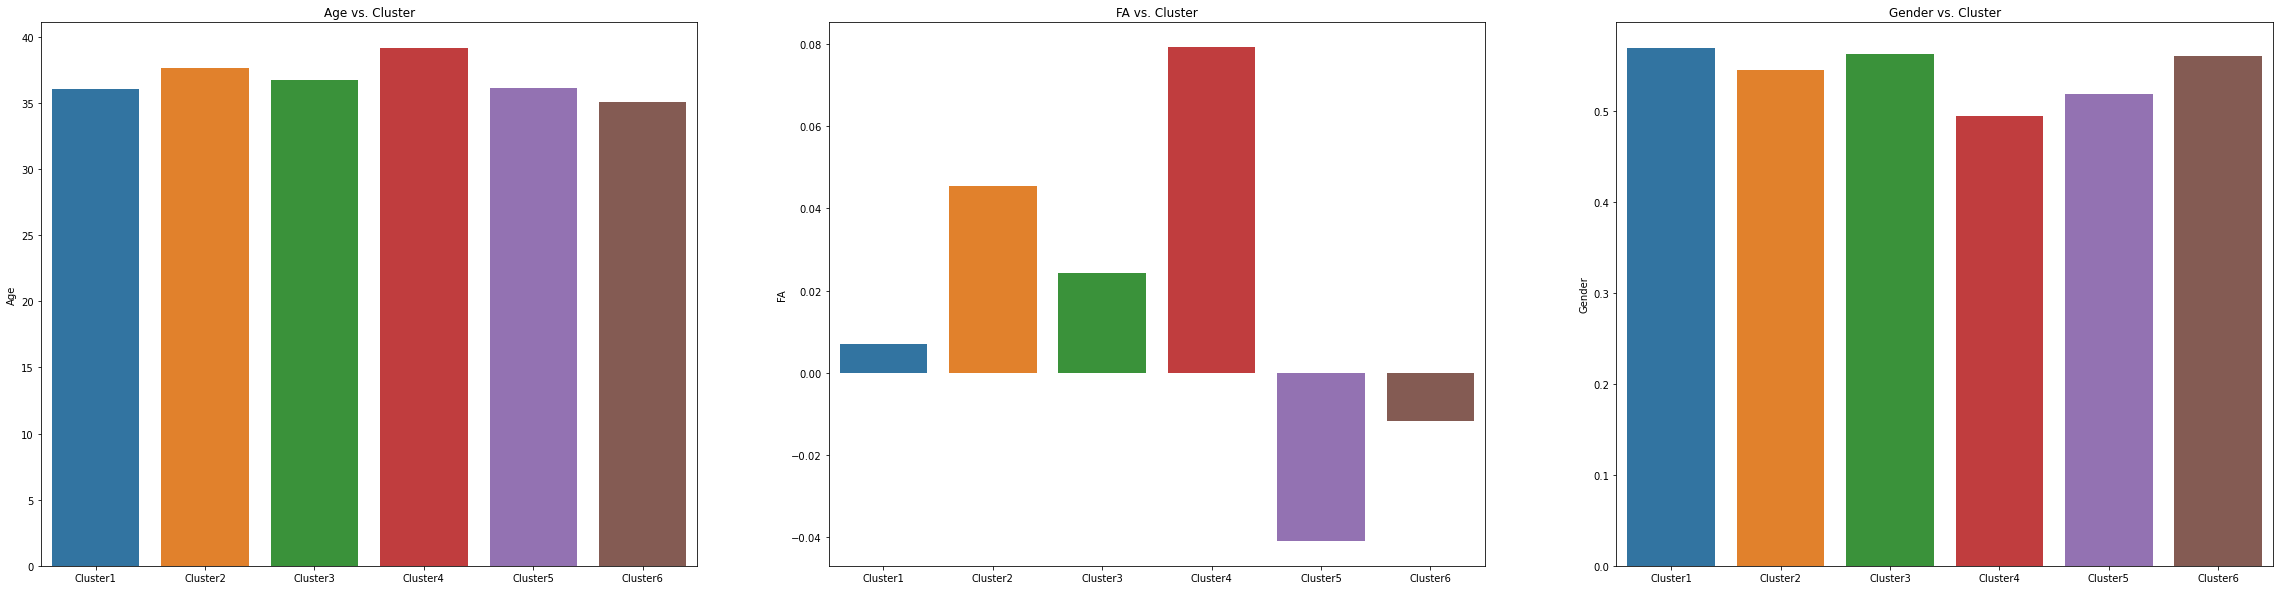

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(40, 10))
clusters = total_features.index
sns.barplot(x=clusters, y=total_features['Age'],ax=ax[0]).set(title = 'Age vs. Cluster')
sns.barplot(x=clusters, y=total_features['FA'],ax=ax[1]).set(title = 'FA vs. Cluster')
sns.barplot(x=clusters, y=total_features['Gender'],ax=ax[2]).set(title = 'Gender vs. Cluster')



### Looking into each one of the clusters to see the different patterns they might have 

(-0.0, 0.6)

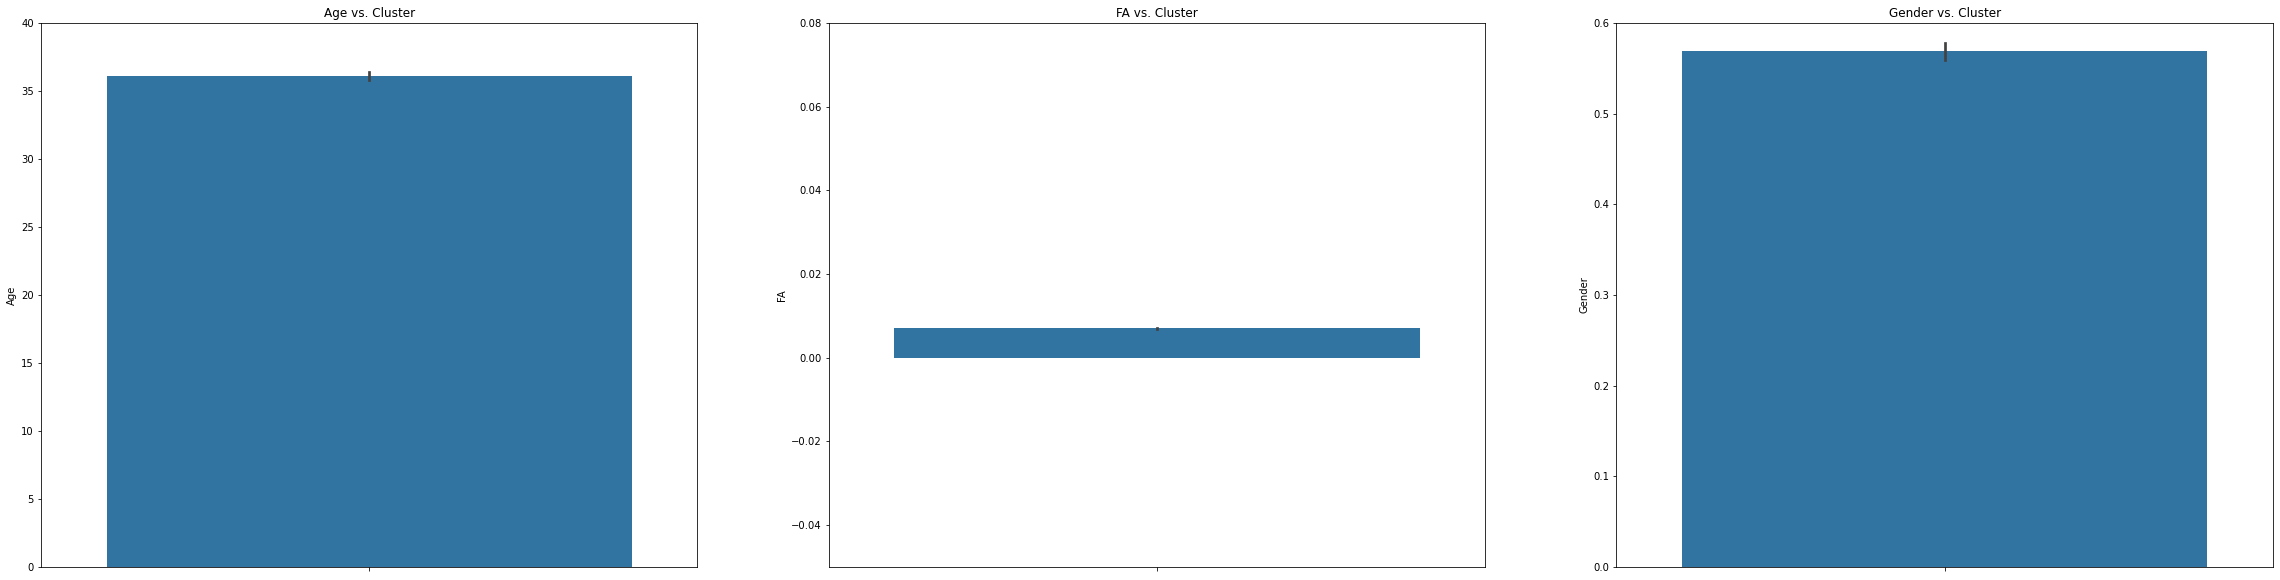

In [27]:
fig1, ax1 = plt.subplots(1, 3, figsize=(40, 10))
clusters = total_features.index
sns.barplot(y=first_cluster['Age'],ax=ax1[0]).set(title = 'Age vs. Cluster')
sns.barplot(y=first_cluster['FA'],ax=ax1[1]).set(title = 'FA vs. Cluster')
sns.barplot(y=first_cluster['Gender'],ax=ax1[2]).set(title = 'Gender vs. Cluster')


# chaging y values
ax1[0].set_ylim(0,40)
ax1[1].set_ylim(-0.05,0.08)
ax1[2].set_ylim(-0.0,0.6)


(-0.0, 0.6)

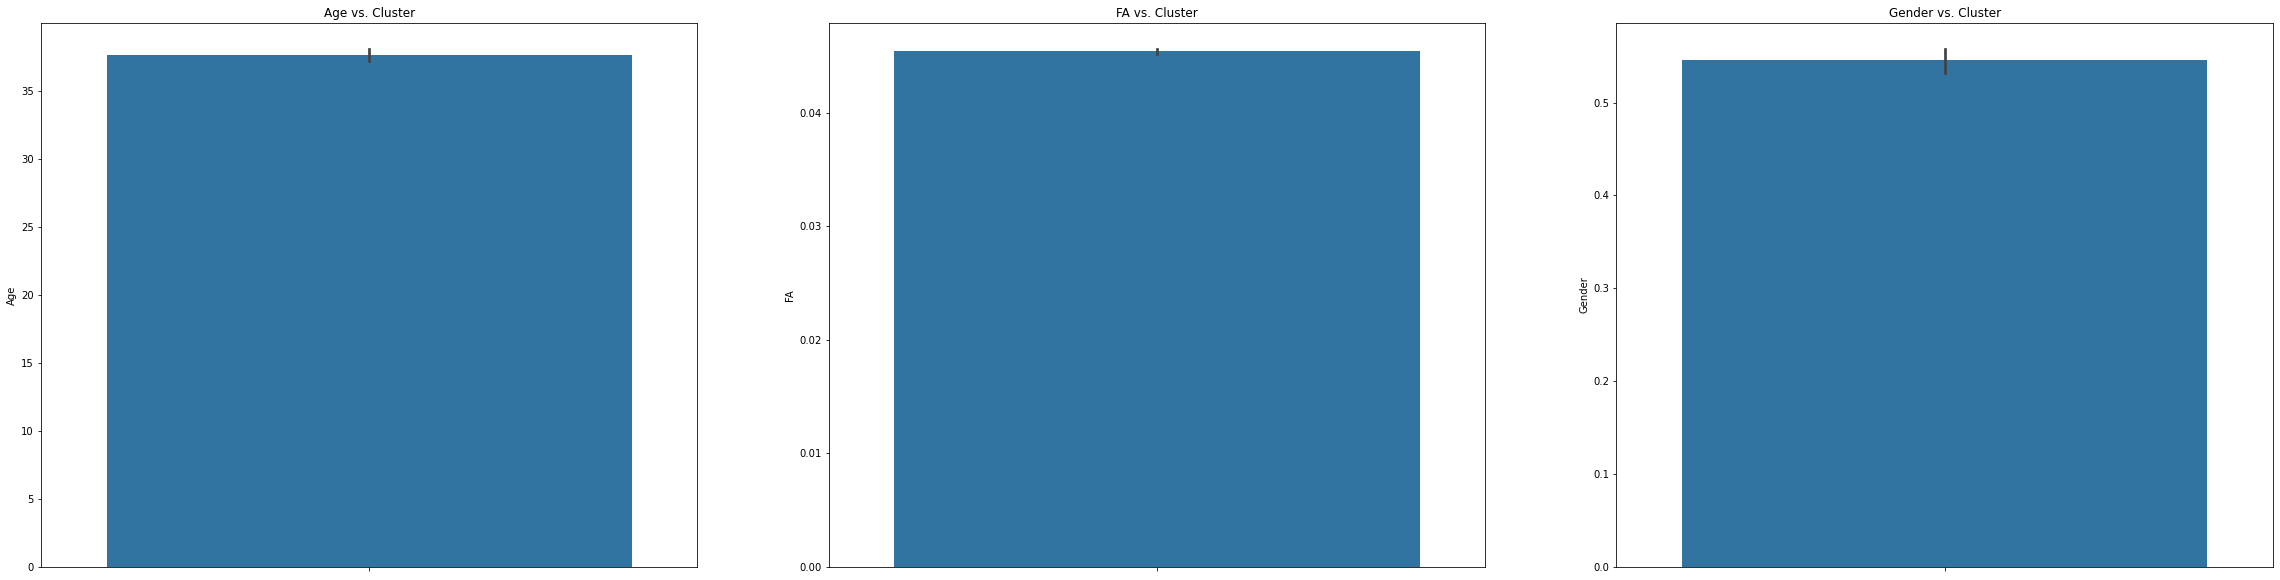

In [28]:
fig2, ax2 = plt.subplots(1, 3, figsize=(40, 10))
clusters = total_features.index
sns.barplot(y=second_cluster['Age'],ax=ax2[0]).set(title = 'Age vs. Cluster')
sns.barplot(y=second_cluster['FA'],ax=ax2[1]).set(title = 'FA vs. Cluster')
sns.barplot(y=second_cluster['Gender'],ax=ax2[2]).set(title = 'Gender vs. Cluster')

# chaging y values
ax1[0].set_ylim(0,40)
ax1[1].set_ylim(-0.05,0.08)
ax1[2].set_ylim(-0.0,0.6)



(-0.0, 0.6)

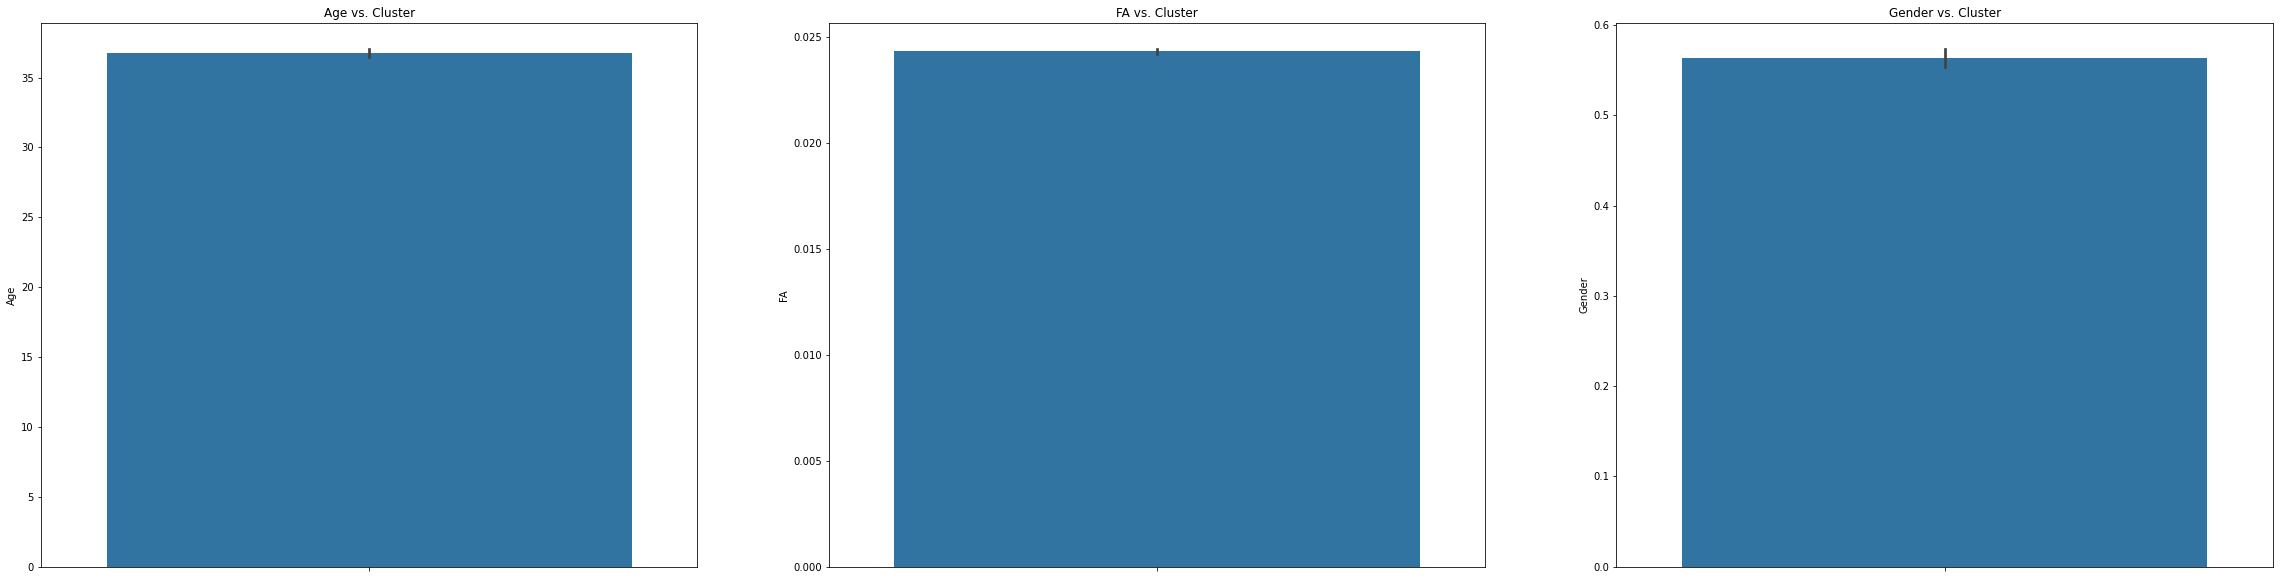

In [29]:
fig3, ax3 = plt.subplots(1, 3, figsize=(40, 10))
clusters = total_features.index
sns.barplot(y=third_cluster['Age'],ax=ax3[0]).set(title = 'Age vs. Cluster')
sns.barplot(y=third_cluster['FA'],ax=ax3[1]).set(title = 'FA vs. Cluster')
sns.barplot(y=third_cluster['Gender'],ax=ax3[2]).set(title = 'Gender vs. Cluster')


# chaging y values
ax1[0].set_ylim(0,40)
ax1[1].set_ylim(-0.05,0.08)
ax1[2].set_ylim(-0.0,0.6)




(-0.0, 0.6)

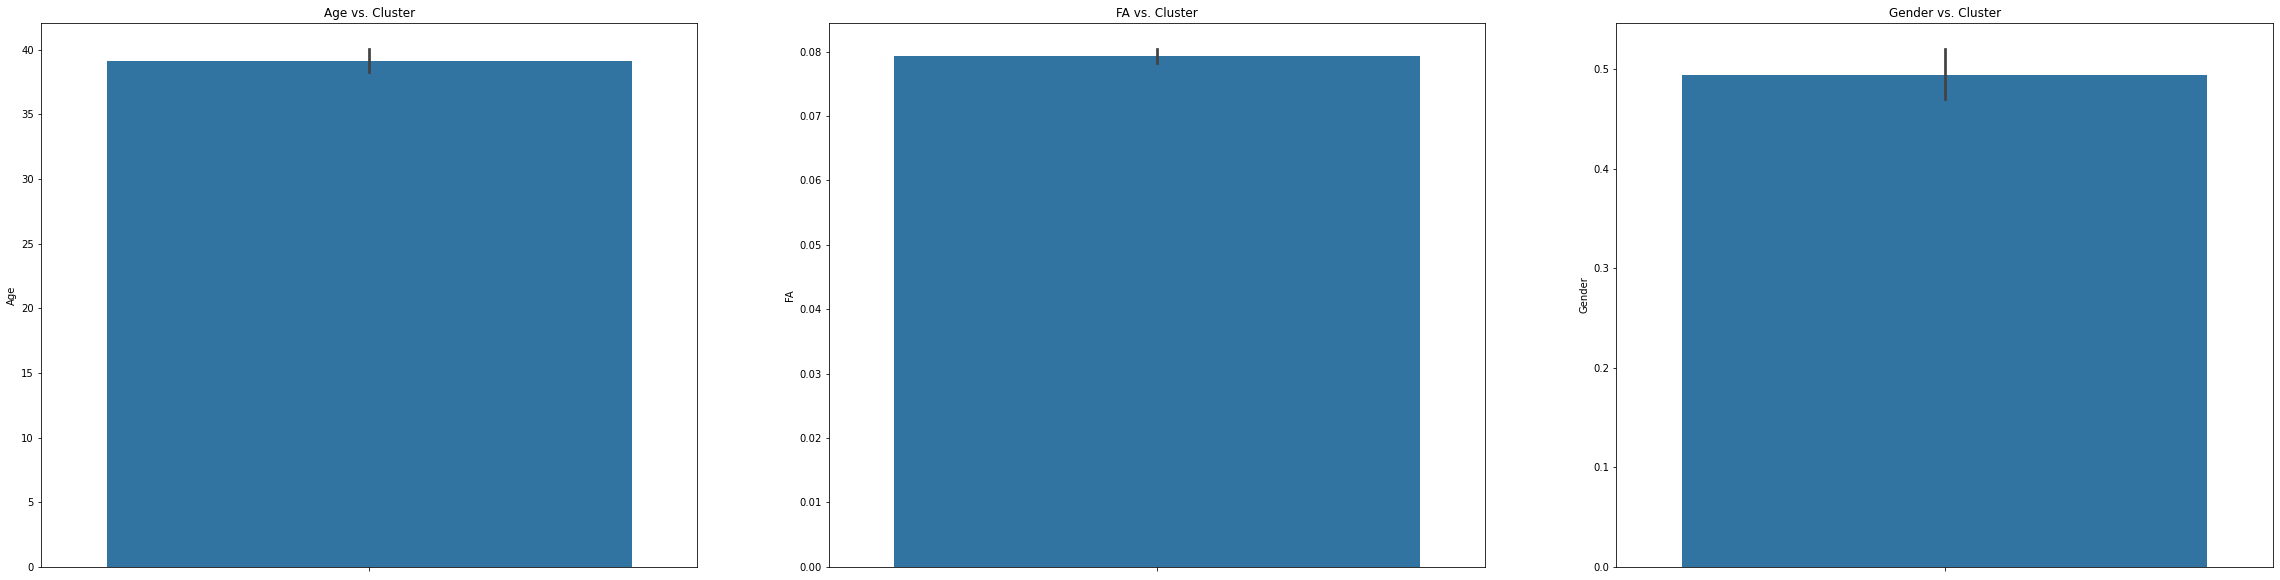

In [30]:
fig4, ax4 = plt.subplots(1, 3, figsize=(40, 10))
clusters = total_features.index
sns.barplot(y=fourth_cluster['Age'],ax=ax4[0]).set(title = 'Age vs. Cluster')
sns.barplot(y=fourth_cluster['FA'],ax=ax4[1]).set(title = 'FA vs. Cluster')
sns.barplot(y=fourth_cluster['Gender'],ax=ax4[2]).set(title = 'Gender vs. Cluster')


# chaging y values
ax1[0].set_ylim(0,40)
ax1[1].set_ylim(-0.05,0.08)
ax1[2].set_ylim(-0.0,0.6)



(-0.0, 0.6)

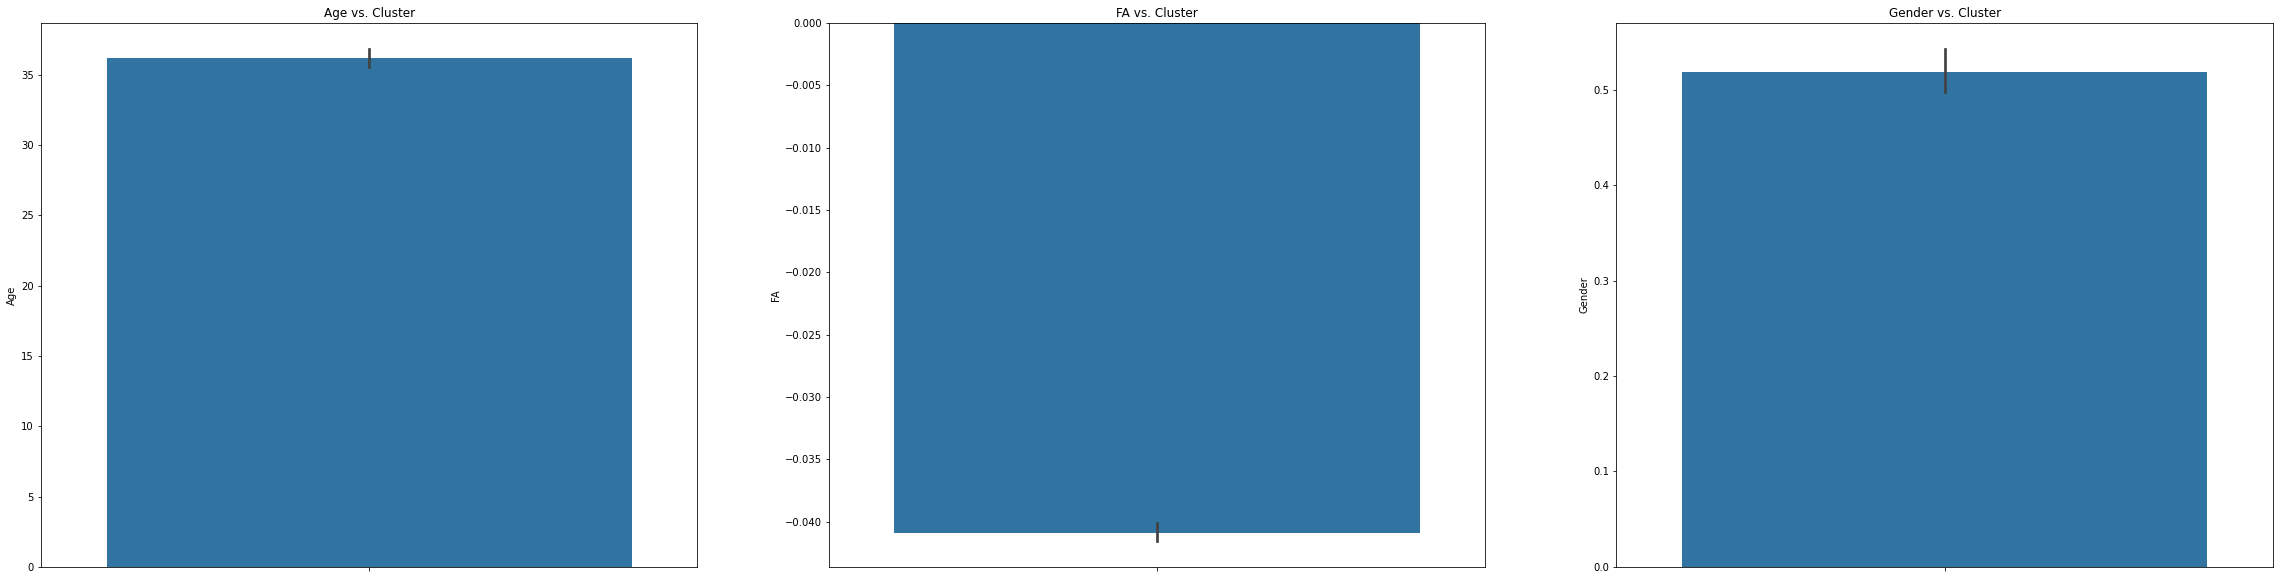

In [31]:
fig5, ax5 = plt.subplots(1, 3, figsize=(40, 10))
clusters = total_features.index
sns.barplot(y=c5['Age'],ax=ax5[0]).set(title = 'Age vs. Cluster')
sns.barplot(y=c5['FA'],ax=ax5[1]).set(title = 'FA vs. Cluster')
sns.barplot(y=c5['Gender'],ax=ax5[2]).set(title = 'Gender vs. Cluster')


# chaging y values
ax1[0].set_ylim(0,40)
ax1[1].set_ylim(-0.05,0.08)
ax1[2].set_ylim(-0.0,0.6)




(-0.0, 0.6)

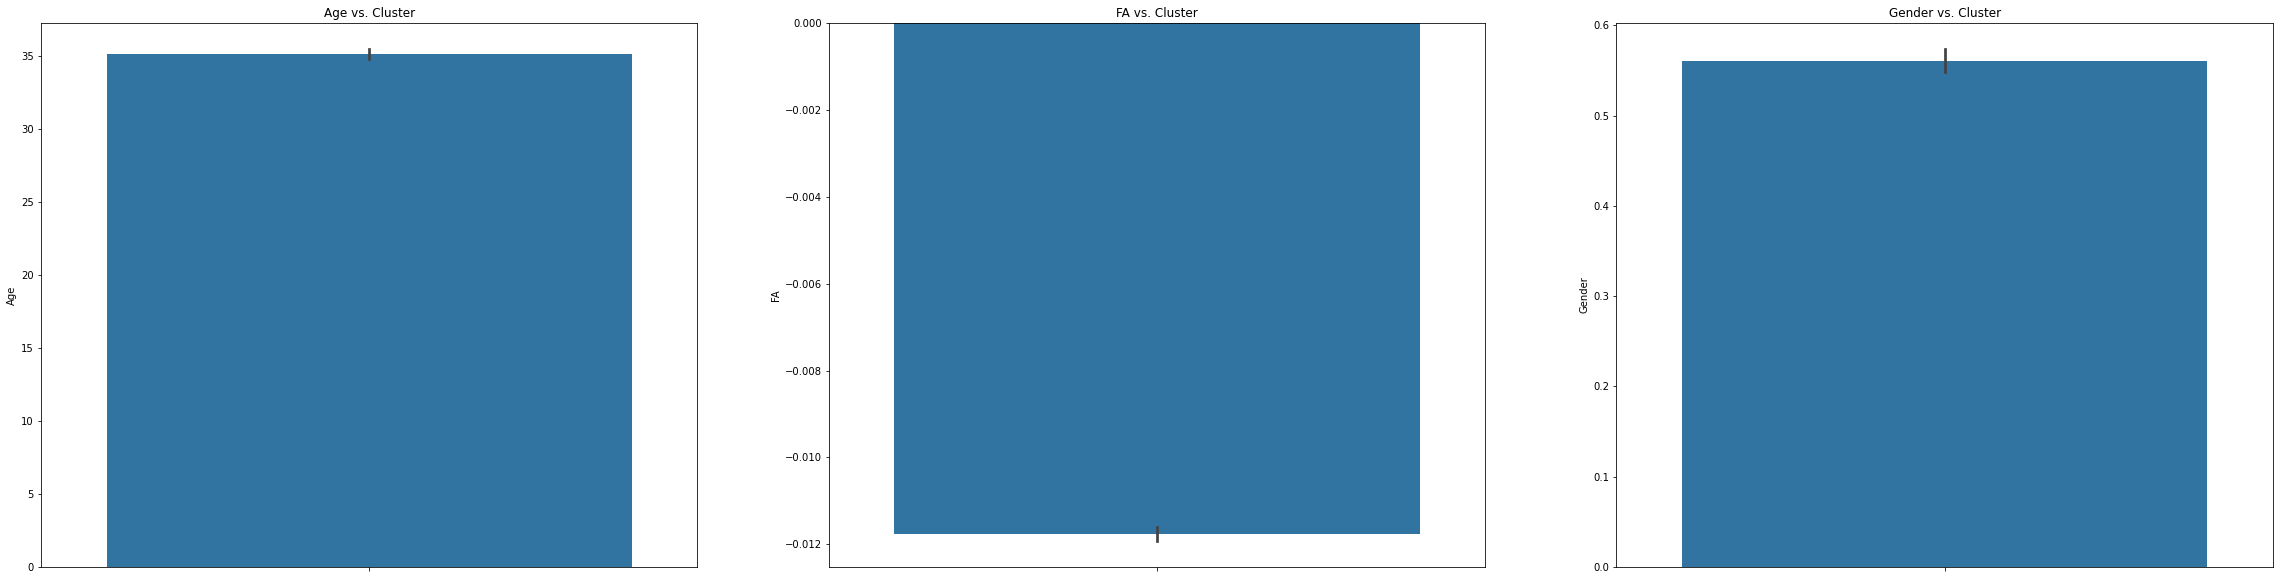

In [32]:
fig6, ax6 = plt.subplots(1, 3, figsize=(40, 10))
clusters = total_features.index
sns.barplot(y=c6['Age'],ax=ax6[0]).set(title = 'Age vs. Cluster')
sns.barplot(y=c6['FA'],ax=ax6[1]).set(title = 'FA vs. Cluster')
sns.barplot(y=c6['Gender'],ax=ax6[2]).set(title = 'Gender vs. Cluster')


# chaging y values
ax1[0].set_ylim(0,40)
ax1[1].set_ylim(-0.05,0.08)
ax1[2].set_ylim(-0.0,0.6)



### Plotting the different features together to see how the clustering was done

<AxesSubplot:xlabel='FA', ylabel='Age'>

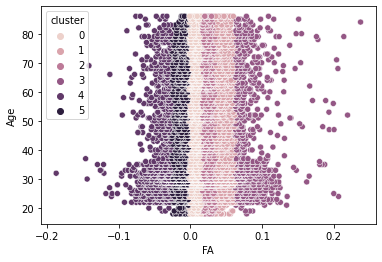

In [33]:
sns.scatterplot(y=cluster_map['Age'], x=cluster_map['FA'], hue=cluster_map['cluster'])

#### Clearly, budget was one of the features that used to cluster the data together as they are clearly seperated apart when budget is plotted.

# This is the Evaluation Part

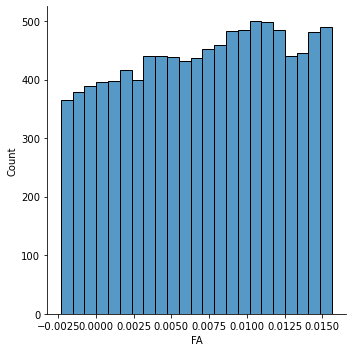

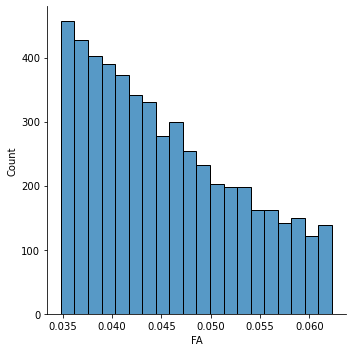

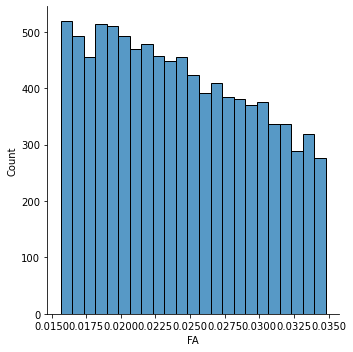

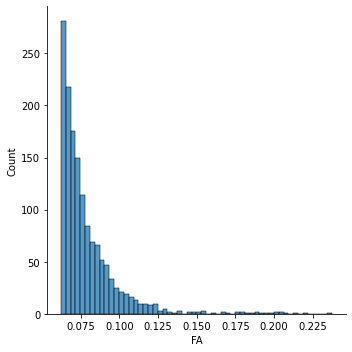

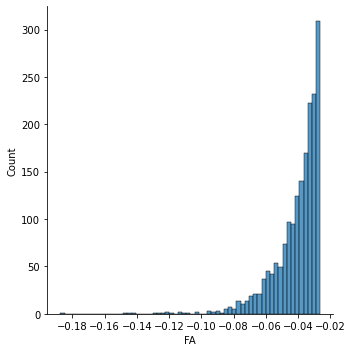

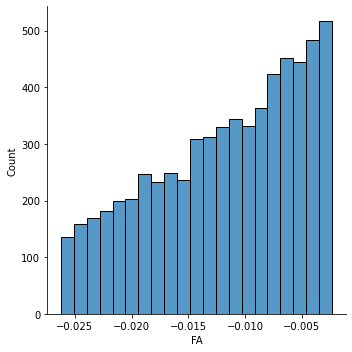

In [34]:
sns.displot(kind='hist',data=first_cluster['FA'])
sns.displot(kind='hist',data=second_cluster['FA'])
sns.displot(kind='hist',data=third_cluster['FA'])
sns.displot(kind='hist',data=fourth_cluster['FA'])
sns.displot(kind='hist',data=c5['FA'])
sns.displot(kind='hist',data=c6['FA'])




In [37]:
first_cluster['AgeGroup']

981      Adolescent
983      Adolescent
985      Adolescent
987      Adolescent
994      Adolescent
            ...    
44589        Senior
44606        Senior
44609        Senior
44618        Senior
44638        Senior
Name: AgeGroup, Length: 10153, dtype: object

<AxesSubplot:xlabel='AgeGroup', ylabel='Area'>

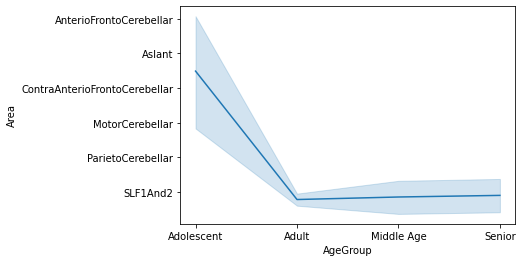

In [35]:
sns.lineplot(x=first_cluster['AgeGroup'], y=first_cluster['Area'])

<AxesSubplot:xlabel='AgeGroup', ylabel='Area'>

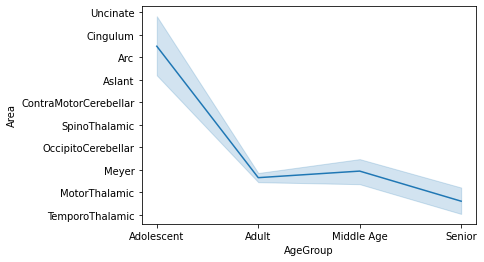

In [39]:
sns.lineplot(x=second_cluster['AgeGroup'], y=second_cluster['Area'])

<AxesSubplot:xlabel='AgeGroup', ylabel='Area'>

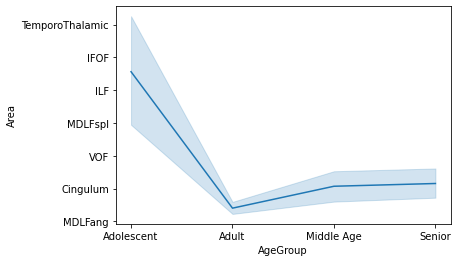

In [40]:
sns.lineplot(x=third_cluster['AgeGroup'], y=third_cluster['Area'])

<AxesSubplot:xlabel='AgeGroup', ylabel='Area'>

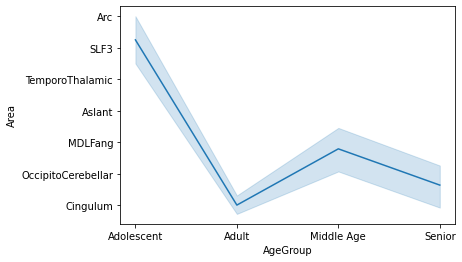

In [41]:
sns.lineplot(x=fourth_cluster['AgeGroup'], y=fourth_cluster['Area'])

<AxesSubplot:xlabel='AgeGroup', ylabel='Area'>

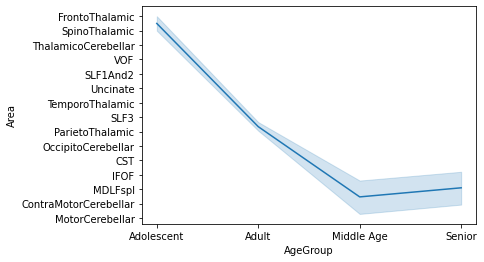

In [42]:
sns.lineplot(x=c5['AgeGroup'], y=c5['Area'])

<AxesSubplot:xlabel='AgeGroup', ylabel='Area'>

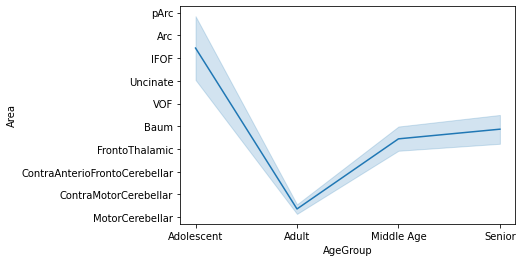

In [43]:
sns.lineplot(x=c6['AgeGroup'], y=c6['Area'])